In [1]:
import numpy as np
import os
import healpy as hp
import matplotlib.pyplot as plt
import loading_data as ld
import visualizing_funcs as vf
import calculations as calc
from PIL import Image
from constants import *
from settings import *

In [2]:
#Find file with all data
filename = data_files_path + "/All_data_3D_temperature_17_dist_bins_nside_128.hdf5"

In [3]:
#Make new directories to store images

flagged_properties_path = image_path + '/Flagged_Properties'

os.makedirs(flagged_properties_path, exist_ok=True)

density_path = os.path.join(flagged_properties_path, 'Density')
if not os.path.exists(density_path):
    os.makedirs(density_path)
    print("Directory ", density_path, " created.")

else:
    print("Directory ", density_path, " already exists.")

temp_path = os.path.join(flagged_properties_path, 'Temperature')
if not os.path.exists(temp_path):
    os.makedirs(temp_path)
    print("Directory ", temp_path, " created.")

else:
    print("Directory ", temp_path, " already exists.")

Directory  /fs/lustre/cita/molinaca/Images/Flagged_Properties/Density  already exists.
Directory  /fs/lustre/cita/molinaca/Images/Flagged_Properties/Temperature  already exists.


In [4]:
#Load data from file
data_dict = ld.load_3D_temperature_data(filename)

n_distslices = data_dict['nr_of_distance_bins'] #defined just to make things easier

In [5]:
#Define variables that will need later
dEBV = data_dict['dEBV']
Ts = data_dict['temperatures']
n_distslices = data_dict['nr_of_distance_bins']
distslices = data_dict['distance_slices']


## Density
Flagging high density regions

In [6]:
#Get dEBV and clip negative values
dEBV = np.clip(dEBV, 0, None)

In [7]:
#Plot dEBV
#vf.plot_dEBV(data_dict)

In [8]:
# Plot histogram of dEBV just to see values
# for ds_index in range(n_distslices):
#     plt.hist(dEBV[ds_index], bins=100, label='dEBV')
#     plt.yscale('log')
#     plt.show()

In [9]:
#Just plot high density pixels, just for visualizing

# primary_threshold = 0.7

# for ds_index in range(n_distslices):
#     # Create an array that is True when density is above threshold, False otherwise
    
#     binary_mask = dEBV[ds_index] > primary_threshold
    
#     # Create an empty map for high-density regions
#     high_density_map = np.zeros_like(dEBV[ds_index])
    
#     # Make locations where binary mask is True have the value of dEBV, otherwise 0 (from intialization)
#     high_density_map[binary_mask] = dEBV[ds_index][binary_mask]
    
#     # Visualize the high-density regions
#     hp.mollview(high_density_map, title=f'High density regions slice {ds_index}', nest=True, cbar=True)
#     plt.show()

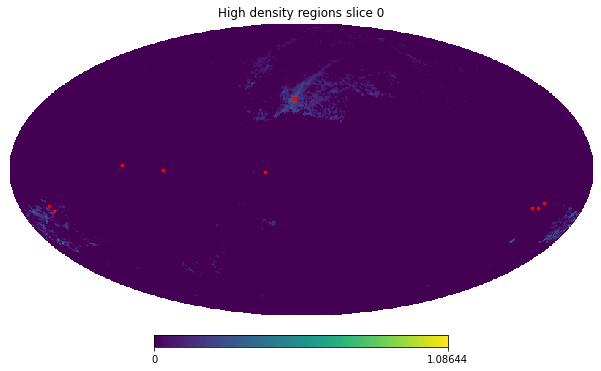

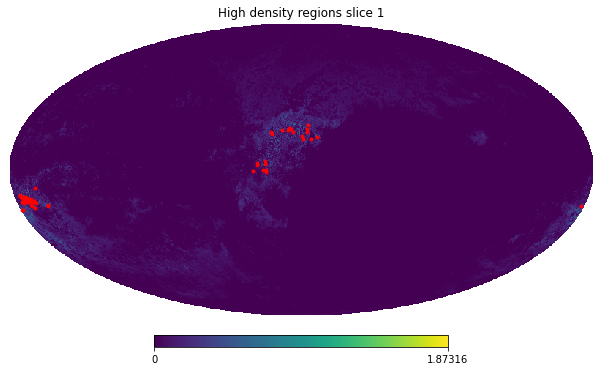

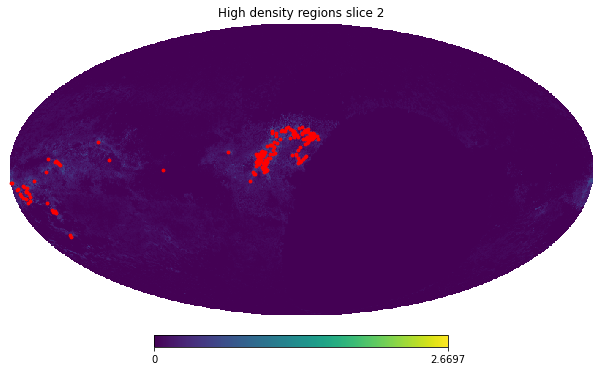

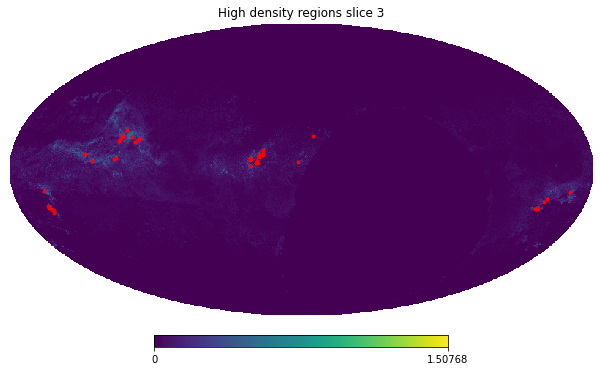

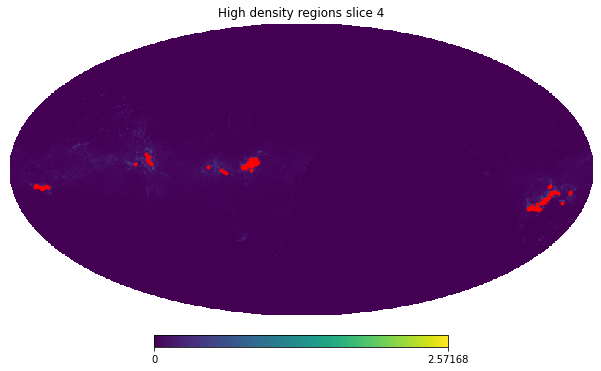

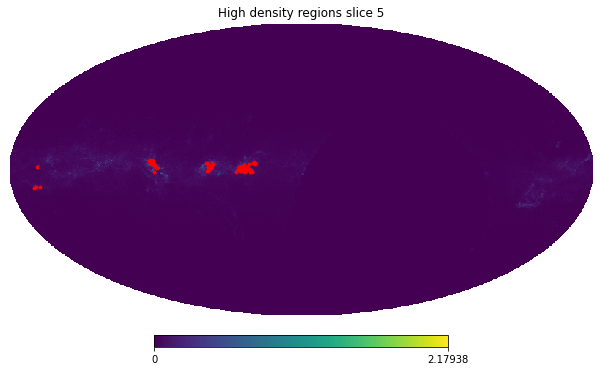

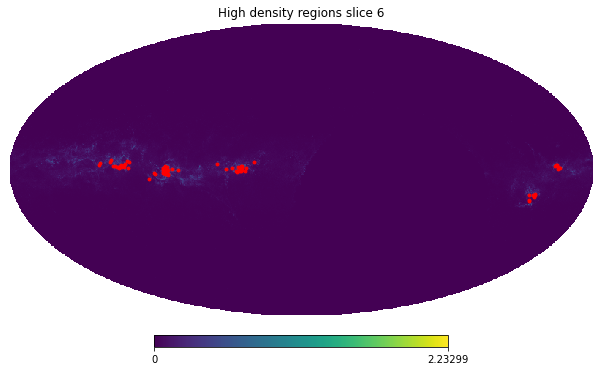

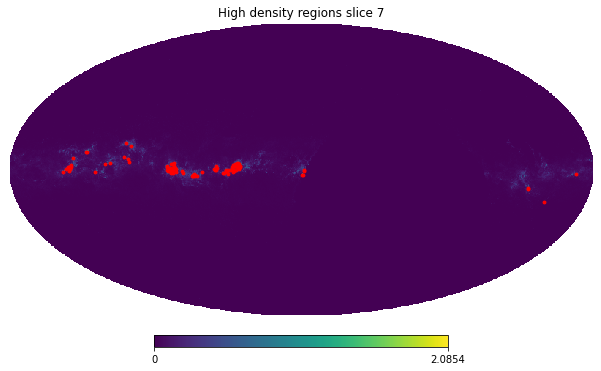

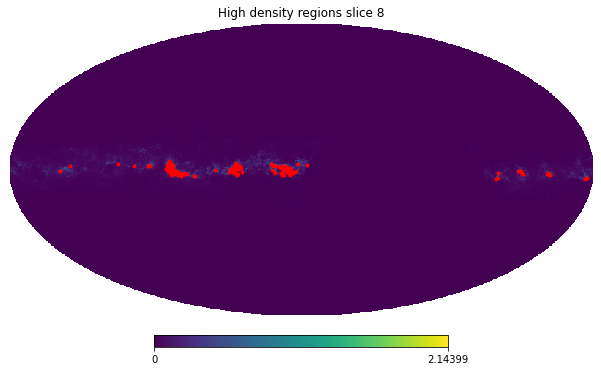

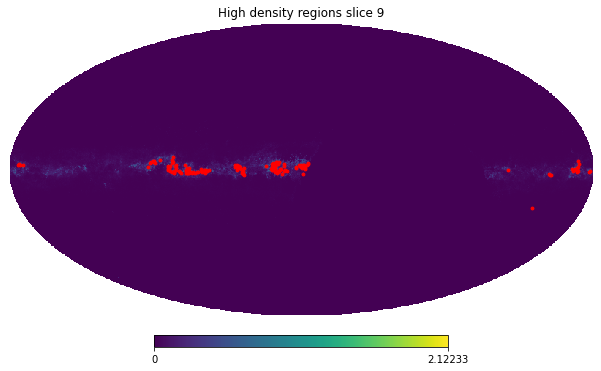

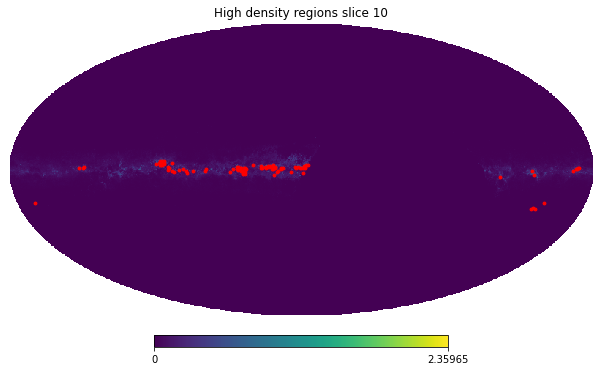

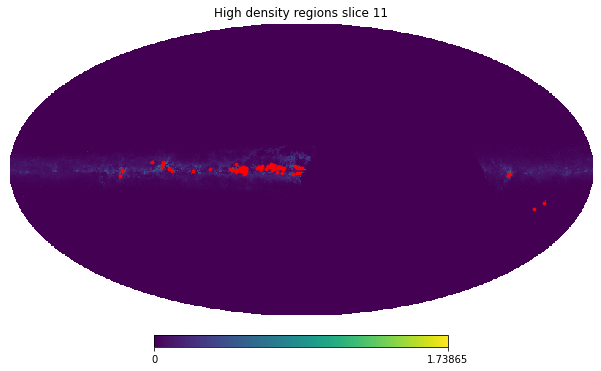

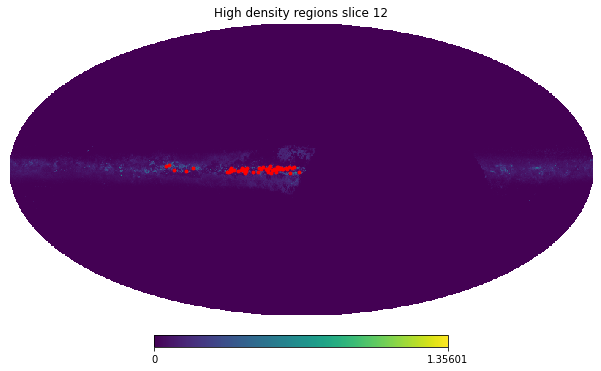

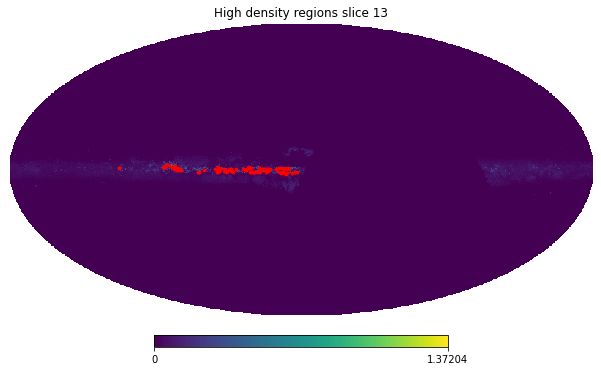

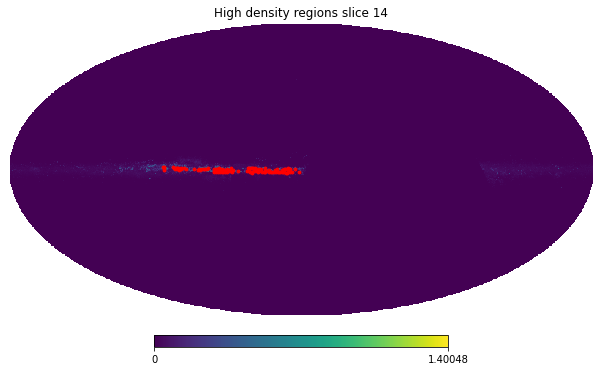

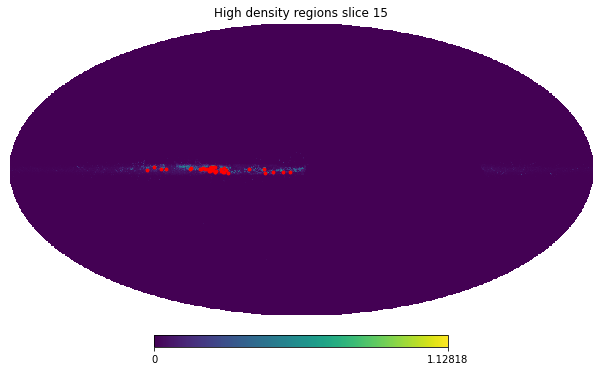

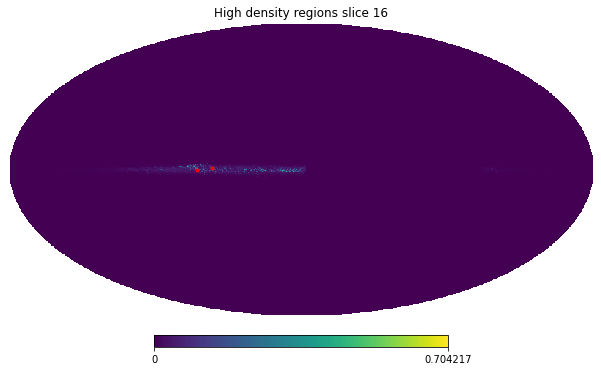

In [10]:
#Instead of pixels get high density regions so that they can be marked on map

nside = hp.get_nside(dEBV[0])

dEBV_primary_threshold = 0.8 #threshold for "high density"
dEBV_secondary_threshold = 0.5 #threshold for "medium density", would be in same region
dEBV_radius = 0.6 #radius around high density region to be considered as part of it

#Get high density regions
highdEBV_info, highdEBV_maps = calc.flag_regions(nside, n_distslices, dEBV, dEBV_primary_threshold, dEBV_secondary_threshold, dEBV_radius)

#Plot region centers over regular dEBV map
vf.overplot_regions_mollview(highdEBV_info, dEBV, n_distslices)

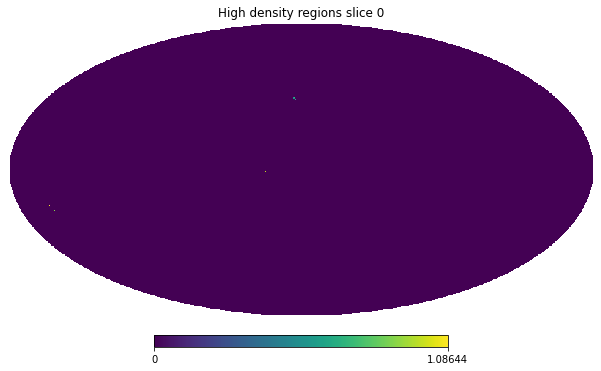

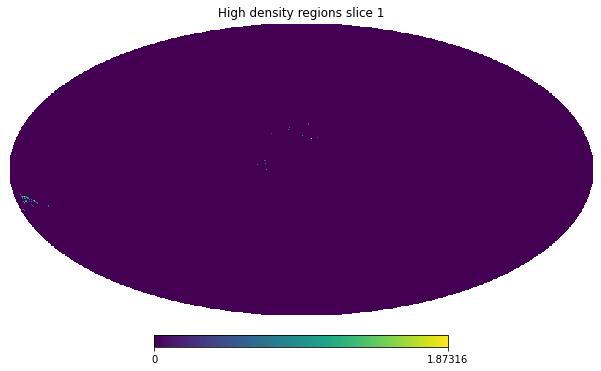

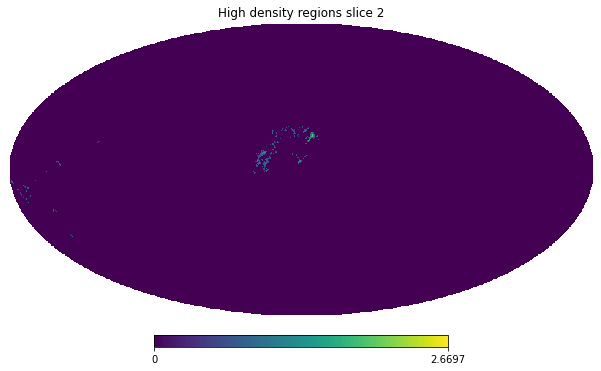

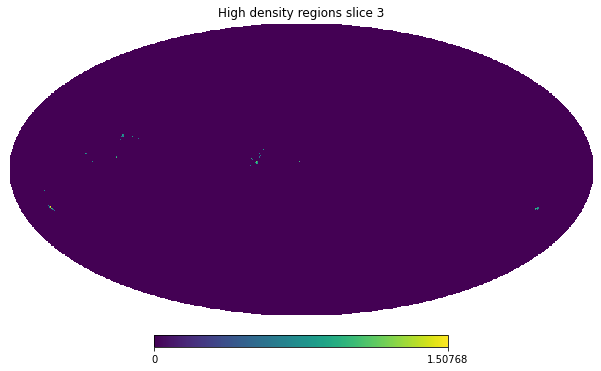

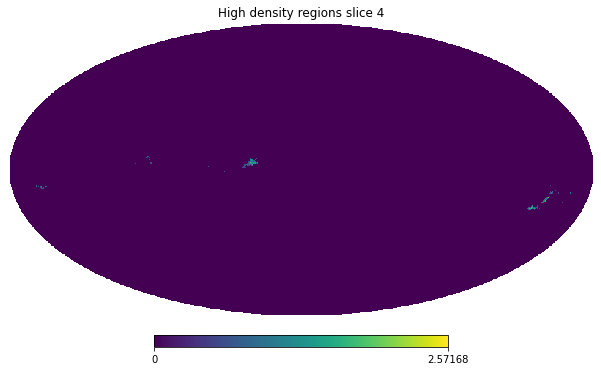

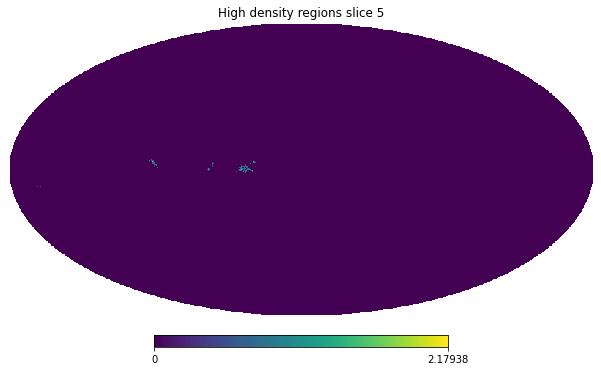

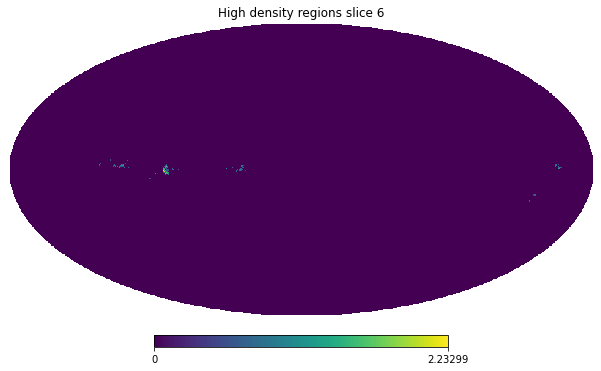

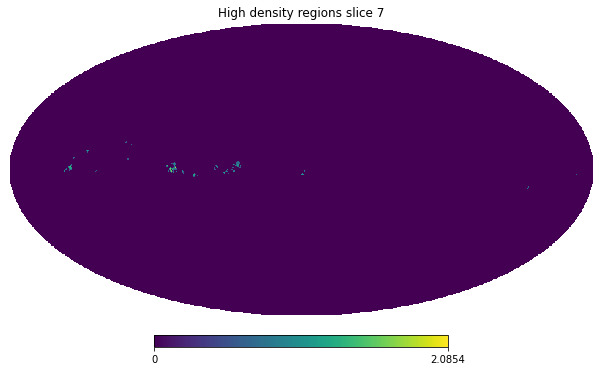

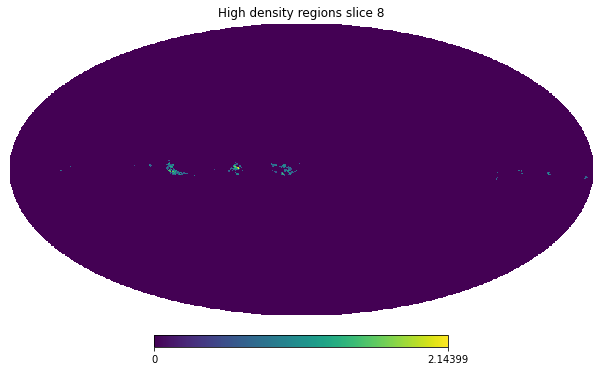

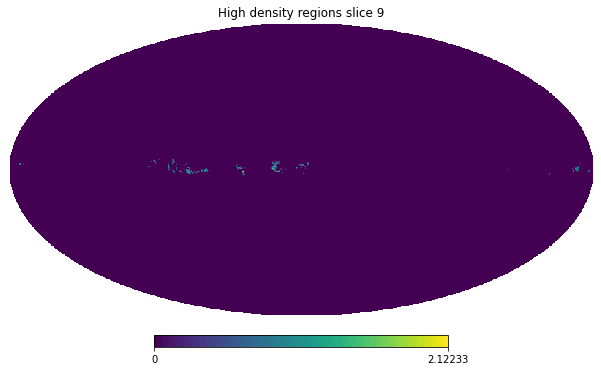

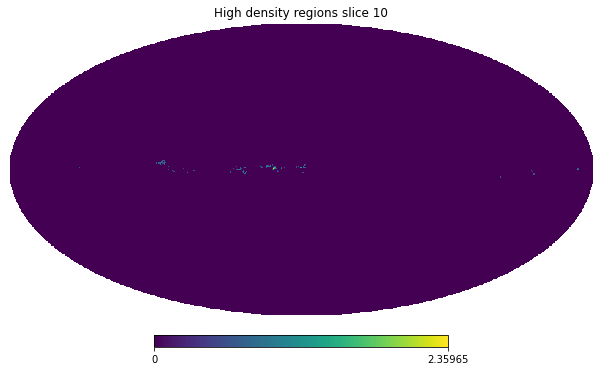

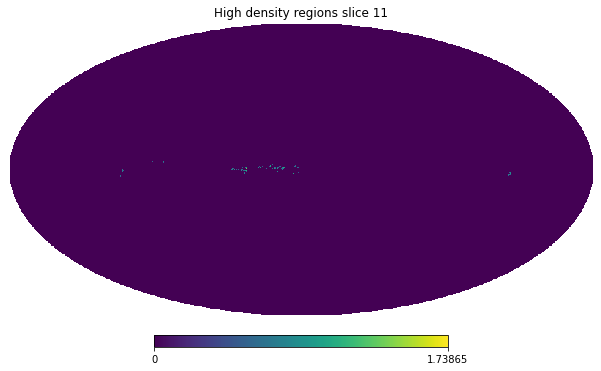

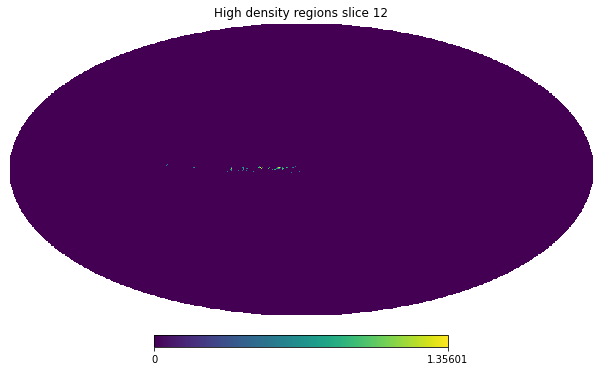

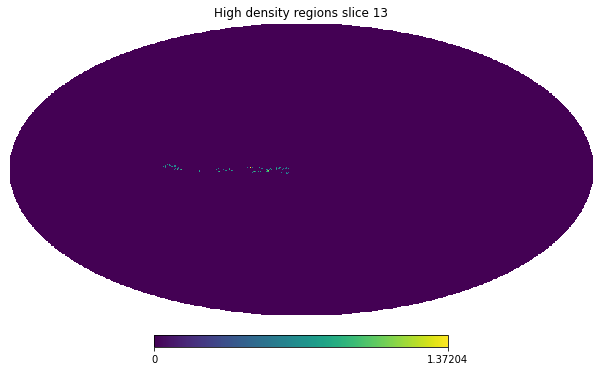

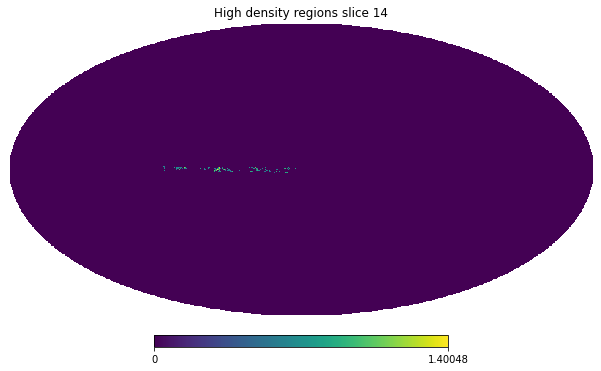

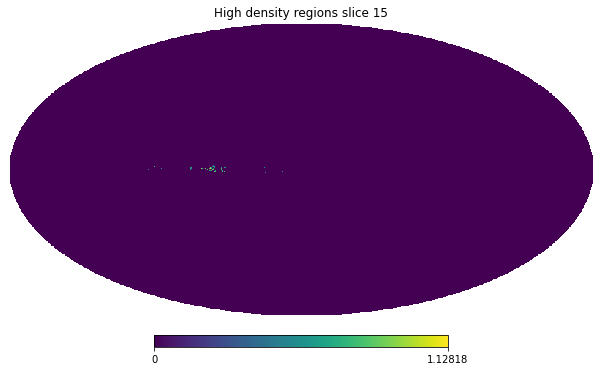

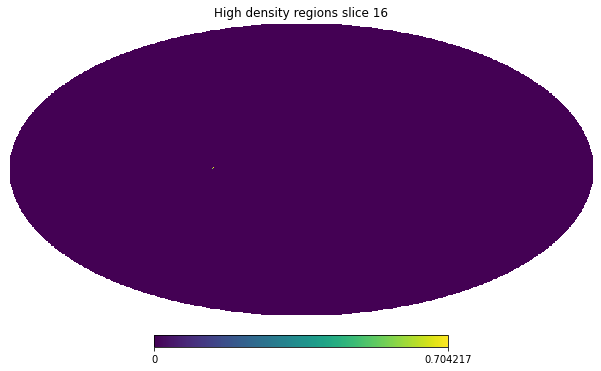

In [11]:
#Plot high density regions 
for ds_index in range(n_distslices):
    hp.mollview(highdEBV_maps[ds_index], title=f'High density regions slice {ds_index}', nest=True, cbar=True)

In [12]:
#Checking number of regions in each distance slice
for ds_index in range(n_distslices):
    print(f"Number of regions in slice {ds_index}: {len(highdEBV_info[ds_index])}")

Number of regions in slice 0: 11
Number of regions in slice 1: 56
Number of regions in slice 2: 181
Number of regions in slice 3: 46
Number of regions in slice 4: 102
Number of regions in slice 5: 65
Number of regions in slice 6: 83
Number of regions in slice 7: 100
Number of regions in slice 8: 153
Number of regions in slice 9: 154
Number of regions in slice 10: 97
Number of regions in slice 11: 72
Number of regions in slice 12: 58
Number of regions in slice 13: 79
Number of regions in slice 14: 111
Number of regions in slice 15: 36
Number of regions in slice 16: 2


In [13]:
#Look at region centers in each molecular cloud

vf.overplot_region_gnomview(highdEBV_info, dEBV, d_orion, rot=[l_orionA,b_orionA], title='High density regions in Orion A', filename=density_path + '/OrionA.png', unit='dEBV')
vf.overplot_region_gnomview(highdEBV_info, dEBV, d_orion, rot=[l_orionB,b_orionB], title='High density regions in Orion B', filename=density_path + '/OrionB.png', unit='dEBV')
vf.overplot_region_gnomview(highdEBV_info, dEBV, d_ceph, rot=[l_ceph,b_ceph], title='High density regions in Cepheus', filename=density_path + '/Cepheus.png', unit='dEBV')
vf.overplot_region_gnomview(highdEBV_info, dEBV, d_perseus, rot=[l_perseus,b_perseus], title='High density regions in Perseus', filename=density_path + '/Perseus.png', unit='dEBV')


In [17]:
#Take a look at what the regions actually look like

#Orion A and B
hp.gnomview(highdEBV_maps[d_orion], rot=[l_orionA, b_orionA], nest=True, title='High Density Region Maps of Orion A', cbar=True, notext=True, unit='dEBV')
plt.savefig(density_path + '/OrionA_map.png')
plt.close()

hp.gnomview(highdEBV_maps[d_orion], rot=[l_orionB, b_orionB], nest=True, title='High Density Region Maps of Orion B', cbar=True, notext=True, unit='dEBV')
plt.savefig(density_path + '/OrionB_map.png')
plt.close()

#Cepheus
hp.gnomview(highdEBV_maps[d_ceph], rot=[l_ceph, b_ceph], nest=True, title='High Density Region Maps of Cepheus', cbar=True, notext=True, unit='dEBV')
plt.savefig(density_path + '/Cepheus_map.png')
plt.close()

#Perseus
hp.gnomview(highdEBV_maps[d_perseus], rot=[l_perseus, b_perseus], nest=True, title='High Density Region Maps of Perseus', cbar=True, notext=True, unit='dEBV')
plt.savefig(density_path + '/Perseus_map.png')
plt.close()


In [18]:
def create_panel(size, figsize, path, images, title, ):
    panel, axs = plt.subplots(size[0], size[1], figsize=figsize)

    for i in range(size[0]):
        for j in range(size[1]):
            img = Image.open(path + f'/{images[i*size[1]+j]}.png')
            axs[i,j].imshow(img)
            axs[i,j].axis('off')

    panel.suptitle(title, fontsize=18)
    plt.tight_layout()     
    plt.show()   

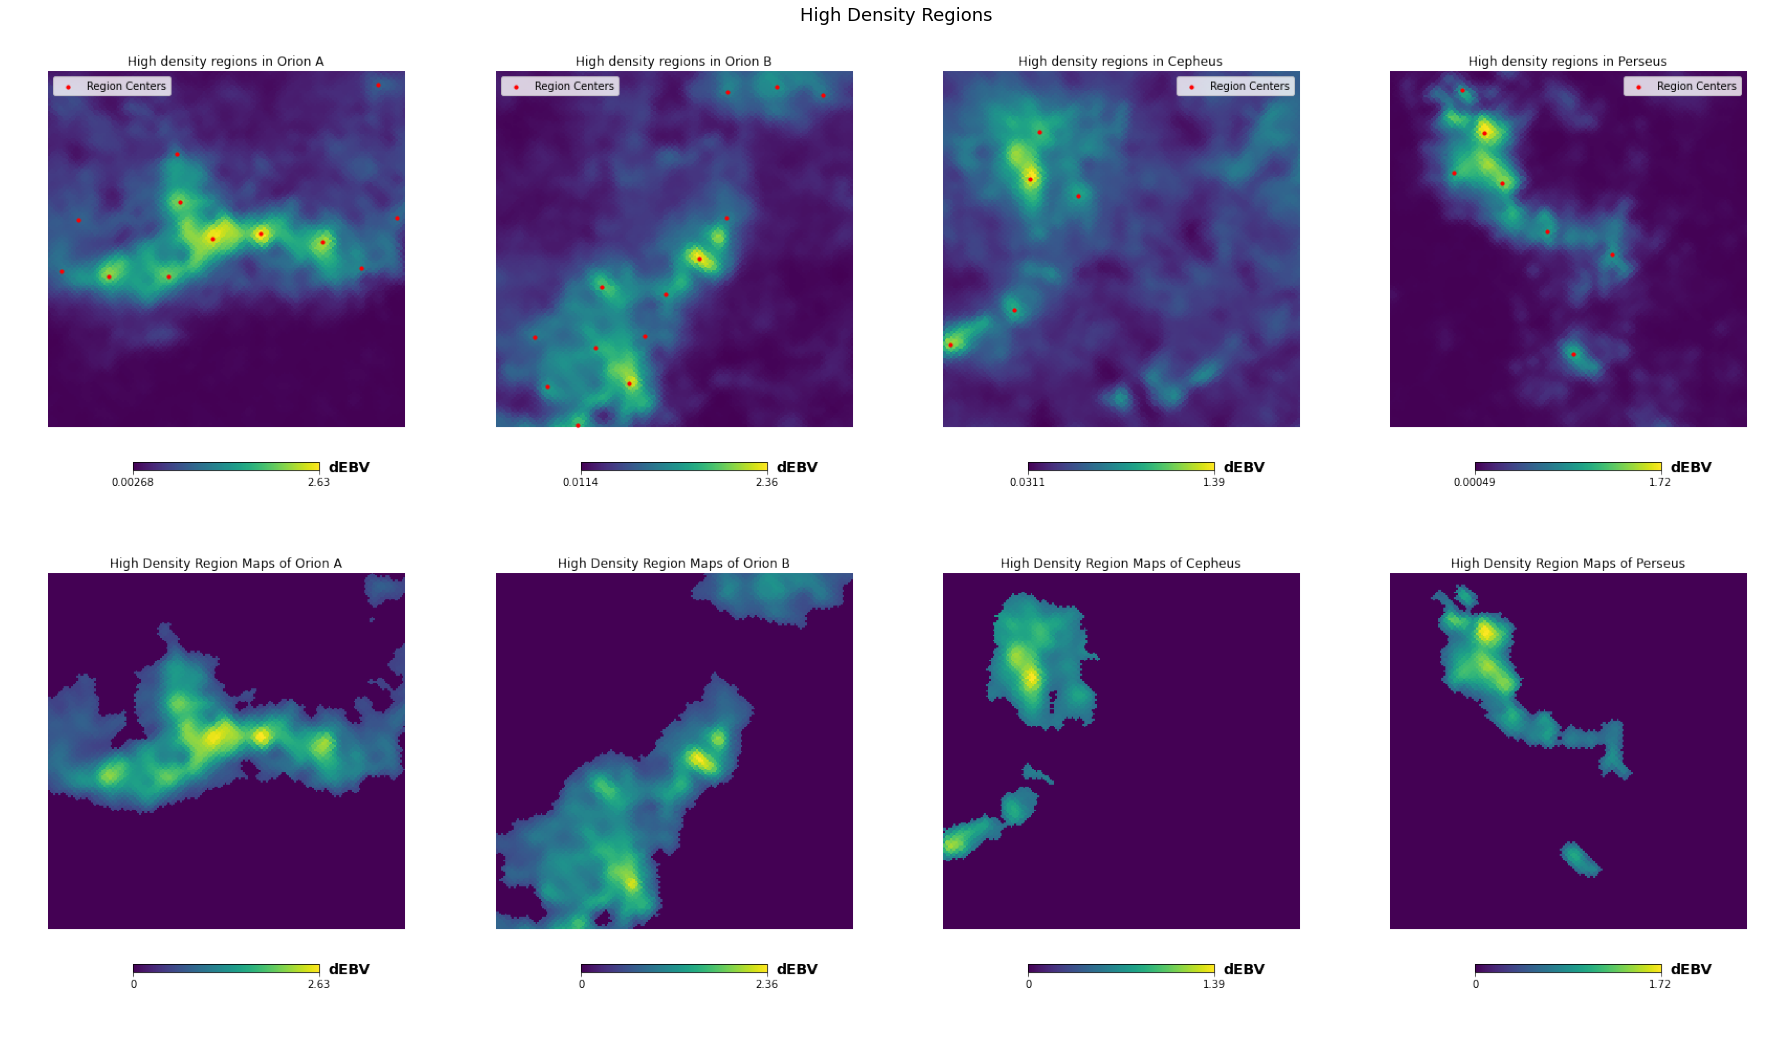

In [19]:
dEBV_imgs = ['OrionA', 'OrionB', 'Cepheus', 'Perseus', 'OrionA_map', 'OrionB_map', 'Cepheus_map', 'Perseus_map']
create_panel([2,4], (25,15), density_path, dEBV_imgs, 'High Density Regions')

In [13]:
#Can use this to filter regions but not really necessary
#orion_regions, orion_regions_all = calc.get_region_maps(region_info, nside, d_orion, filter=True, rot=[l_orionA, b_orionA], radius = 0.2, combine=True)
#hp.mollview(orion_regions_all, title='Orion A Region', nest=True, cbar=True)

## Temperature

In [21]:
#Want to work with dens x temp because should only be looking at regions with dust anyways

Ts_new = calc.increase_temp_res(data_dict, 1024)

pixels = len(Ts_new[0]) #Get number of pixels

dens_temp = np.zeros((n_distslices, pixels)) #Initialize array for density*temperature

for ds_index in range(n_distslices):
    dens_temp[ds_index] = dEBV[ds_index]*Ts_new[ds_index] #Multiply dEBV and Ts


In [22]:
#Tried using dens_temp to get threshold, not exactly what i want so commented it out for now
hightemp_threshold = 20
hightemp_threshold2 = 10
hightemp_radius = 0.6

high_temp_info, high_temp_maps = calc.flag_regions(nside, n_distslices, dens_temp, hightemp_threshold, hightemp_threshold2, dEBV_radius)

#vf.overplot_region_gnomview(high_temp_info, dens_temp, d_orion, rot=[l_orionA,b_orionA], title='High dEBV & Temperature Regions in Orion A') #Note made before changes to vf function so would not work
#hp.gnomview(high_temp_maps[d_orion], rot=[l_orionA, b_orionA], nest=True, title='High dEBV & Temperature Regions of Orion', cbar=True, notext=True)

In [23]:
#Try with regular temperature map, ok but shows regions where there is no dust
justhightemp_threshold = 19
justhightemp_threshold2 = 17


high_justtemp_info, high_justtemp_maps = calc.flag_regions(nside, n_distslices, Ts_new, justhightemp_threshold, justhightemp_threshold2, hightemp_radius)

#vf.overplot_region_gnomview(high_justtemp_info, Ts_new, d_orion, rot=[l_orionA,b_orionA], title='High temperature regions in Orion A')
#vf.overplot_region_gnomview(high_justtemp_info, dens_temp, d_orion, rot=[l_orionA,b_orionA], title='High temperature regions in Orion B')

In [24]:
#Compare to RGB channels

T = [10, 18.8, 30]
frequency = np.zeros(3)

for i in range(len(T)):
    frequency[i] = calc.WiensLaw(T[i])

windowed_T = calc.get_temptracers_at_freq(Ts_new, method='custom', limits=[16,19])
dens_ttracer = calc.multiply_dEBVandTtracer(data_dict, dEBV, windowed_T, frequency)
dens_ttracer_norm = calc.normalize_multiplied_array(data_dict, dens_ttracer, frequency)
R, G, B = calc.get_RGB(dens_ttracer_norm)

brightness_factor = 5
R, G, B = vf.brighten_image(R, brightness_factor), vf.brighten_image(G, brightness_factor), vf.brighten_image(B, brightness_factor)


In [48]:
#Get RGB images of Orion A and B

R_orionA, G_orionA, B_orionA, RGB_orionA = vf.get_region_image(R, G, B, d_orion, l_orionA, b_orionA, 200, 200, scale=True)
RGB_orionA.save(temp_path + '/OrionA_RGB.png')

R_orionB, G_orionB, B_orionB, RGB_orionB = vf.get_region_image(R, G, B, d_orion, l_orionB, b_orionB, 200, 200, scale=True)
RGB_orionB.save(temp_path + '/OrionB_RGB.png')


In [28]:
#Get region centers high in R and B
blue_region_info, blue_region_maps = calc.flag_regions(nside, n_distslices, B, 150, 50, 0.8)
red_region_info, red_region_maps = calc.flag_regions(nside, n_distslices, R, 150, 50, 0.8)


vf.overplot_region_gnomview(blue_region_info, B, d_orion, rot=[l_orionA,b_orionA], title='High blue regions in Orion A', filename=temp_path + '/OrionA_blue.png', unit='B')

#Code to plot B over dEBV: vf.overplot_region_gnomview(blue_region_info, dEBV, d_orion, rot=[l_orionA,b_orionA], title='High blue regions in Orion A', filename=temp_path + '/OrionA_blue_dEBV.png', unit='dEBV')


vf.overplot_region_gnomview(red_region_info, R, d_orion, rot=[l_orionA,b_orionA], title='High red regions in Orion B', filename=temp_path + '/OrionA_red.png', unit='R')
#Code to plot R over dEBV: vf.overplot_region_gnomview(red_region_info, dEBV, d_orion, rot=[l_orionA,b_orionA], title='High red regions in Orion B', filename=temp_path + '/OrionA_red_dEBV.png', unit='dEBV')

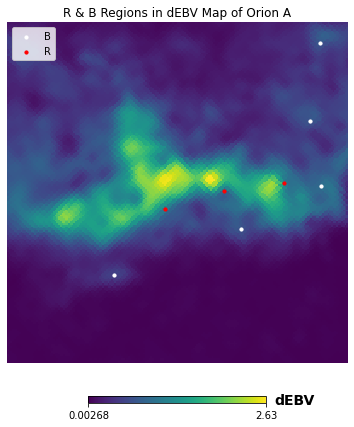

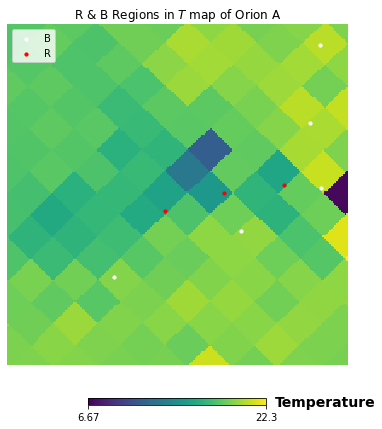

In [31]:

blue_centers_d4 = np.array([region['center'] for region in blue_region_info[d_orion]])
red_centers_d4 = np.array([region['center'] for region in red_region_info[d_orion]])

hp.gnomview(dEBV[d_orion], rot=[l_orionA, b_orionA], xsize=200, ysize=200, nest=True, title='R & B Regions in dEBV Map of Orion A', cbar=True, notext=True, unit='dEBV')
hp.projscatter(blue_centers_d4[:,0], blue_centers_d4[:,1], c='white', marker='o', s=10)
hp.projscatter(red_centers_d4[:,0], red_centers_d4[:,1], c='red', marker='o', s=10)
plt.legend(['B', 'R'])
plt.savefig(temp_path + '/OrionA_R&B.png')
plt.show()

hp.gnomview(Ts_new[d_orion], rot=[l_orionA, b_orionA], xsize=200, ysize=200, nest=True, title='R & B Regions in $T$ map of Orion A', cbar=True, notext=True, unit='K')
hp.projscatter(blue_centers_d4[:,0], blue_centers_d4[:,1], c='white', marker='o', s=10)
hp.projscatter(red_centers_d4[:,0], red_centers_d4[:,1], c='red', marker='o', s=10)
plt.legend(['B', 'R'])
plt.savefig(temp_path + '/OrionA_R&B_temp.png')
plt.show()

In [45]:
#Now look at regions with R and B regions close to one another

distance_threshold = 0.02  # Example threshold in radians

#Do this by looking at angular distance between centers of regions
def angular_distance(theta1, phi1, theta2, phi2):
    vec1 = hp.ang2vec(theta1, phi1)
    vec2 = hp.ang2vec(theta2, phi2)
    return hp.rotator.angdist(vec1, vec2)

#Take midpoint to be center of region with both
def midpoint_spherical(theta1, phi1, theta2, phi2):
    vec1 = hp.ang2vec(theta1, phi1)
    vec2 = hp.ang2vec(theta2, phi2)
    mid_vec = (vec1 + vec2) / np.linalg.norm(vec1 + vec2)
    return hp.vec2ang(mid_vec)



In [46]:
matched_regions_midpoints = []

for hot_theta, hot_phi in blue_centers_d4:
    for cold_theta, cold_phi in red_centers_d4:
        if angular_distance(hot_theta, hot_phi, cold_theta, cold_phi) <= distance_threshold:
            mid_theta, mid_phi = midpoint_spherical(hot_theta, hot_phi, cold_theta, cold_phi)
            matched_regions_midpoints.append([float(mid_theta),float(mid_phi)])
            break # If you only want to add the midpoint once

matched_regions_midpoints = np.array(matched_regions_midpoints)
print(matched_regions_midpoints[0])

[1.55028649 0.63851893]


In [47]:
hp.gnomview(dEBV[d_orion], rot=[l_orionA, b_orionA], xsize=200, ysize=200, nest=True, title='Regions with Close R & B in Orion A', cbar=True, notext=True, unit='dEBV')
hp.projscatter(matched_regions_midpoints[:,0], matched_regions_midpoints[:,1], c='red', marker='o', s=15)
plt.savefig(temp_path + '/OrionA_bothR&B.png')
plt.close()

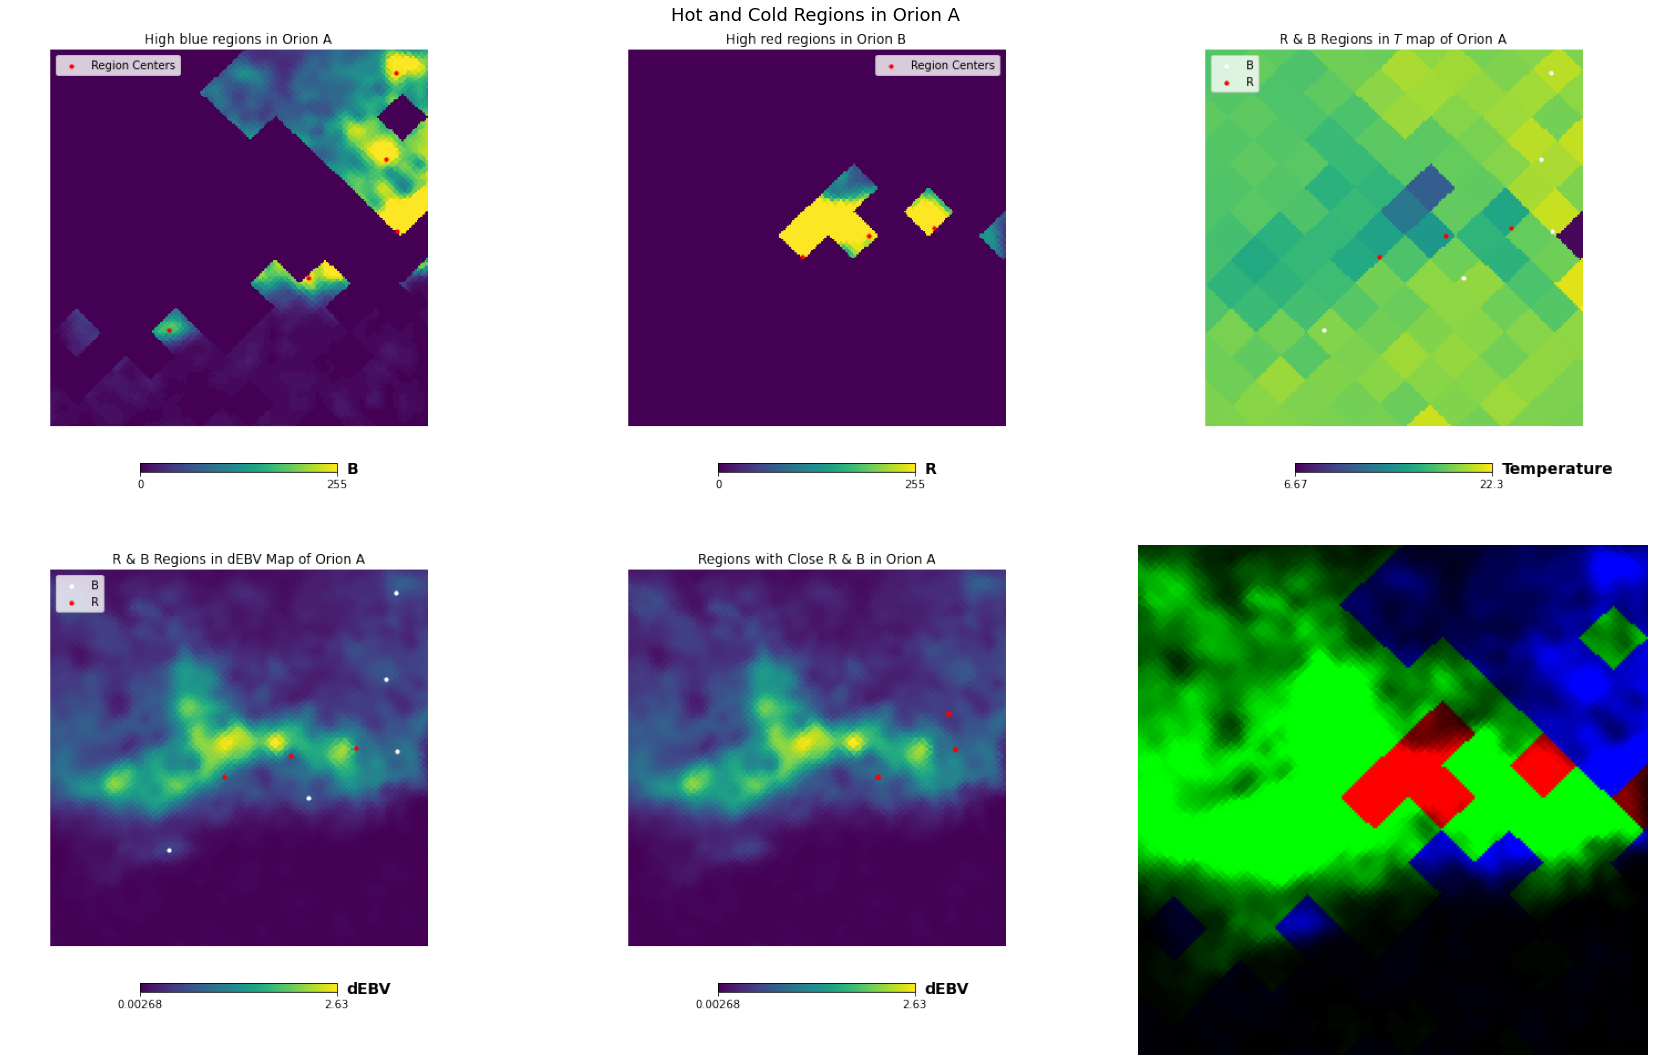

In [44]:
orionA_imgs = ['OrionA_blue', 'OrionA_red', 'OrionA_R&B_temp', 'OrionA_R&B', 'OrionA_bothR&B', 'OrionA_RGB']
create_panel([2,3], (25,15), temp_path, orionA_imgs, 'Hot and Cold Regions in Orion A')

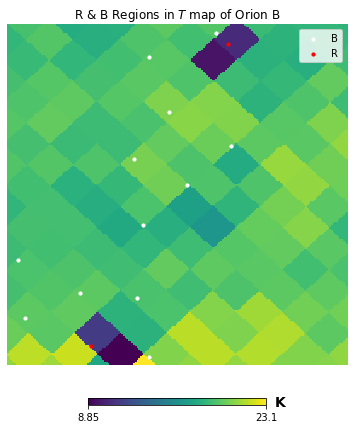

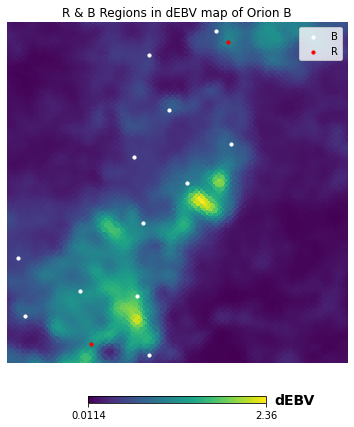

In [49]:
#Now do same for Orion B
vf.overplot_region_gnomview(blue_region_info, B, d_orion, rot=[l_orionB,b_orionB], title='High blue regions in Orion B', filename=temp_path + '/OrionB_blue.png', unit='B')
vf.overplot_region_gnomview(red_region_info, R, d_orion, rot=[l_orionB,b_orionB], title='High red regions in Orion B', filename=temp_path + '/OrionB_red.png', unit='R')

hp.gnomview(Ts_new[d_orion], rot=[l_orionB, b_orionB], xsize=200, ysize=200, nest=True, title='R & B Regions in $T$ map of Orion B', cbar=True, notext=True, unit='K')
hp.projscatter(blue_centers_d4[:,0], blue_centers_d4[:,1], c='white', marker='o', s=10)
hp.projscatter(red_centers_d4[:,0], red_centers_d4[:,1], c='red', marker='o', s=10)
plt.legend(['B', 'R'])
plt.savefig(temp_path + '/OrionB_R&B_temp.png')
plt.show()

hp.gnomview(dEBV[d_orion], rot=[l_orionB, b_orionB], xsize=200, ysize=200, nest=True, title='R & B Regions in dEBV map of Orion B', cbar=True, notext=True, unit='dEBV')
hp.projscatter(blue_centers_d4[:,0], blue_centers_d4[:,1], c='white', marker='o', s=10)
hp.projscatter(red_centers_d4[:,0], red_centers_d4[:,1], c='red', marker='o', s=10)
plt.legend(['B', 'R'])
plt.savefig(temp_path + '/OrionB_R&B.png')
plt.show()

hp.gnomview(dEBV[d_orion], rot=[l_orionB, b_orionB], xsize=200, ysize=200, nest=True, title='Regions with Close R & B in Orion B', cbar=True, notext=True, unit='dEBV')
hp.projscatter(matched_regions_midpoints[:,0], matched_regions_midpoints[:,1], c='red', marker='o', s=15)
plt.savefig(temp_path + '/OrionB_bothR&B.png')
plt.close()




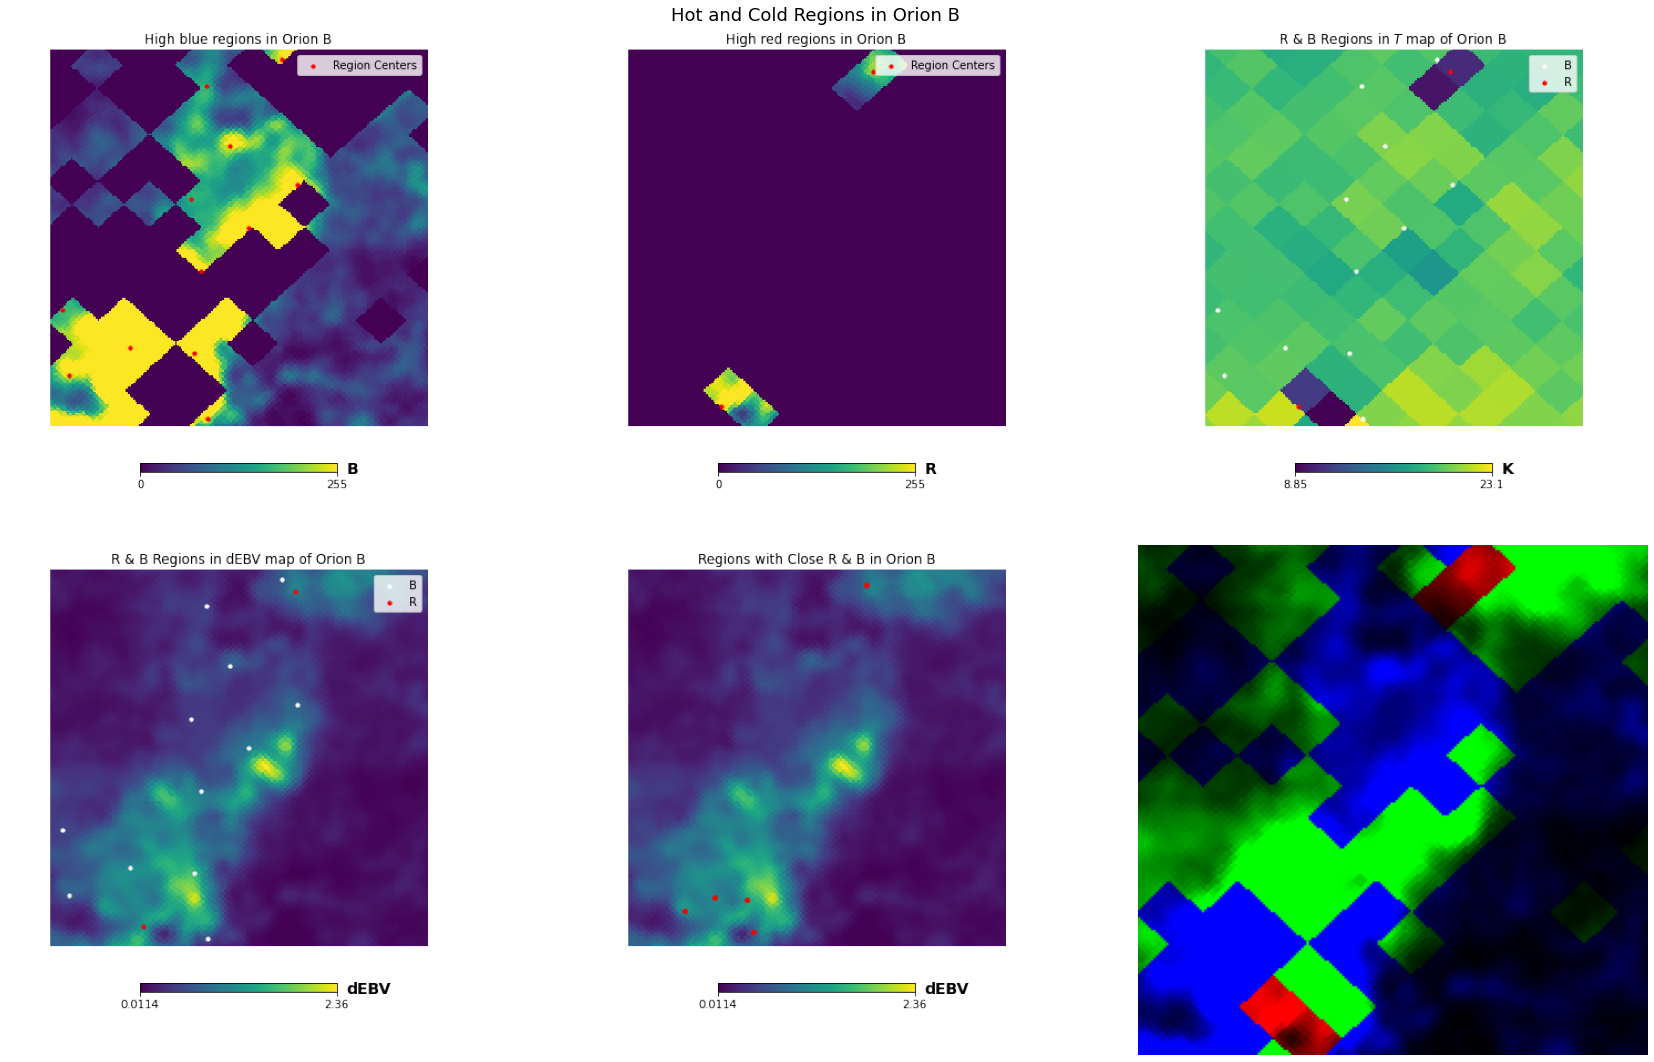

In [50]:
orionB_imgs = ['OrionB_blue', 'OrionB_red', 'OrionB_R&B_temp', 'OrionB_R&B', 'OrionB_bothR&B', 'OrionB_RGB']
create_panel([2,3], (25,15), temp_path, orionB_imgs, 'Hot and Cold Regions in Orion B')

In [35]:
#Trying to overplot in image
# RGB_orion_array = np.array(RGB_orion)

# fig = plt.figure()
# hp.gnomview(map=None, rot=[l_orionA, b_orionA], xsize=200, return_projected_map=True, notext=True)
# ax = plt.gca()
# ax.imshow(RGB_orion_array, extent=[206, 217, -15.5, -23.5], aspect='auto')
# plt.axis('off')
# hp.projscatter(blue_centers[:,0], blue_centers[:,1], s=10, marker='o', color='white')
# plt.show()